### Najkraća putanja
Nakon plotovanja tačaka kreiramo funkcije za brute force i optimizovani način za pronalaženje najkraće duži.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)
def generacija_tacaka(n, plotting=True):
    '''n-broj tacaka'''
    koordinate_x = np.random.randint(1,100,n)
    koordinate_y = np.random.randint(1,100,n)
    tacke = []
    for x,y in zip(koordinate_x,koordinate_y):
        tacke.append((x,y))
    if plotting:
        plt.figure(figsize=(8,8))
        plt.scatter(koordinate_x,koordinate_y, s=5)
        plt.title('Nasumične tačke u koordinatnom sistemu (0,100)')
        plt.xlabel('x')
        plt.ylabel('y');
    return tacke

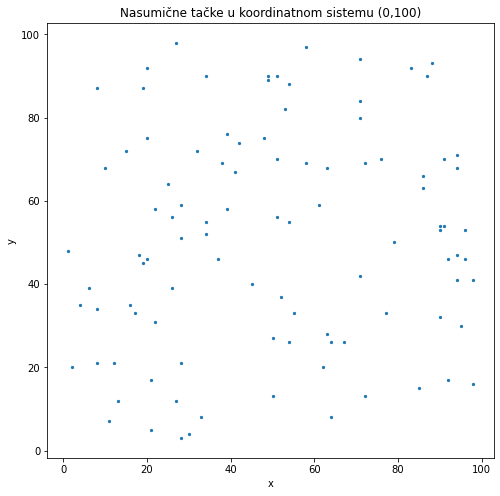

In [20]:
tacke = generacija_tacaka(100)

In [8]:
from itertools import combinations

def povuci_sve_duzi(tacke):
    sve_duzi = []
    for duz in combinations(tacke,2):
        sve_duzi.append(duz)
#     print(f'povučeno duži: {len(sve_duzi)}')
    return sve_duzi

In [7]:
def izracunaj_najkracu_duz(sve_duzi):
    
    izracunate_duzi = dict()
    for index in range(len(sve_duzi)):
        x,y = sve_duzi[index]
        izracunate_duzi[index] = []
        x_diff = x[0]-x[1]
        y_diff = y[0]-y[1]
        izracunate_duzi[index].append((x_diff**2+y_diff**2)**0.5)
    
    minimum = min(izracunate_duzi.values())
    
    for key, value in izracunate_duzi.items():
        if value==minimum:
            return sve_duzi[key], value

In [21]:
sve_duzi = povuci_sve_duzi(tacke)
tacke_najkrace_duzi, duz =izracunaj_najkracu_duz(sve_duzi)
print('Tacke najkrace duzi:', tacke_najkrace_duzi)
print('Duzina najkrace duzi', duz[0])

Tacke najkrace duzi: ((13, 12), (54, 55))
Duzina najkrace duzi 1.4142135623730951


In [28]:
np.random.seed(2021)
tacke_najkrace_duzi=tacke_najkrace_duzi
def plotovanje_tacaka_najkrace_duzi(n, tacke_najkrace_duzi=tacke_najkrace_duzi, plotting=True):
    '''n-broj tacaka'''
    koordinate_x = np.random.randint(1,100,n)
    koordinate_y = np.random.randint(1,100,n)
    tacke = []
    for x,y in zip(koordinate_x,koordinate_y):
        tacke.append((x,y))
    if plotting:
        plt.figure(figsize=(8,8))
        plt.scatter(koordinate_x,koordinate_y, s=5)
        plt.scatter(tacke_najkrace_duzi[0], tacke_najkrace_duzi[1], c='red', label='najbliže tačke', s=10)
        plt.title('Nasumične tačke u koordinatnom sistemu (0,100)')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend();
    return tacke

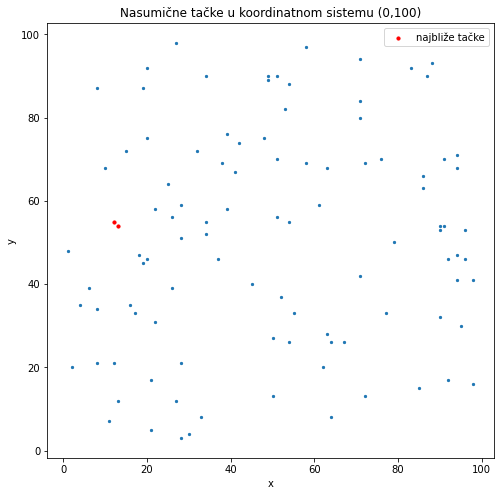

In [29]:
tacke = plotovanje_tacaka_najkrace_duzi(100)

### Optimizacija

In [30]:
def distance(p1,p2):
    xdiff = p1[0]-p2[0]
    ydiff=p1[0]-p2[0]
    return (xdiff**2+ydiff**2)**0.5

In [32]:
def bruteforce(points):
    return min(
        (distance(*pairing), pairing)
        for pairing in combinations(points,2))

In [48]:
def mindistance(tacke):
    duzina = len(tacke)
    if duzina <5:
        return bruteforce(tacke)
    
    leve_tacke = tacke[:duzina//2]
    desne_tacke = tacke[duzina//2:]
    
    najkraca_u_levim = mindistance(leve_tacke)
    najkraca_u_desnim = mindistance(desne_tacke)
    
#     print(40*'==')
    
#     print('najkraca_u_levim:', najkraca_u_levim)
#     print('najkraca_u_desnim:', najkraca_u_desnim)
    
    d = min(najkraca_u_levim, najkraca_u_desnim)[0]
    
#     print('d', min(najkraca_u_levim, najkraca_u_desnim), 'd[0]', d)
    
#     print(40*'==')
    
    limit_right=[tacka for tacka in desne_tacke if abs(tacka[0]- desne_tacke[0][0]) <= d]
    
    limit_left= [tacka for tacka in leve_tacke if abs(tacka[0] - leve_tacke[-1][0])<=d]
   
    distances =[najkraca_u_levim, najkraca_u_desnim]
    for x in limit_left:
        for y in limit_right:
            distances.append((distance(x,y), (x,y)))
    return min(distances)

In [46]:
import time
start = time.monotonic()
sve_duzi = povuci_sve_duzi(tacke)
najkraca_duz1 = izracunaj_najkracu_duz(sve_duzi)
end = time.monotonic()
print('potrebno vreme za brute force:', round(end-start,3), 'sekunde')

potrebno vreme za brute force: 0.022 sekunde


In [50]:
start = time.monotonic()
najkraca_optimizovana = mindistance(tacke)
end = time.monotonic()
print('potrebno vreme za optimizovani search:', round(end-start,4), 'sekunde')

potrebno vreme za optimizovani search: 0.0022 sekunde
